<a href="https://colab.research.google.com/github/yachu33/PCA_practice_iris/blob/master/PCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Iris

It is the normal iris dataset.

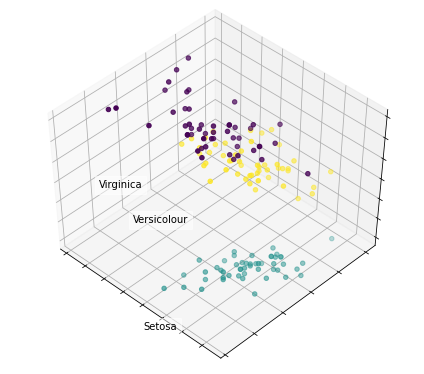

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
X

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [0]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

Train Score: [0.6666666666666666, 0.9714285714285714, 0.9809523809523809, 0.9904761904761905, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing Score: [0.6666666666666666, 0.8888888888888888, 0.9777777777777777, 0.8888888888888888, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


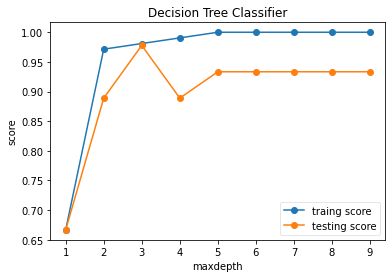

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees with depth = X

depths=np.arange(1,10)
training_scores=[]
testing_scores=[]
for depth in depths:
  DecTree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=depth, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=42, splitter='best')
  DecTree.fit(X_train, y_train)
  training_scores.append(DecTree.score(X_train,y_train))
  testing_scores.append(DecTree.score(X_test,y_test))

print('Train Score:', training_scores)
print('Testing Score:',testing_scores)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(depths,training_scores,label="traing score",marker='o')
ax.plot(depths,testing_scores,label="testing score",marker='o')
ax.set_title("Decision Tree Classifier")
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.legend(framealpha=0.5,loc='best')
plt.show()


由上圖可以看出當max_depth=3時，有最高的testing score，因此設定max_depth為3

### Question #2:

Predict the testing data. What is your accuracy_score?

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score

DecTree = DecisionTreeClassifier(max_depth=3)
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_score)


Accuracy: 0.9333333333333333


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)


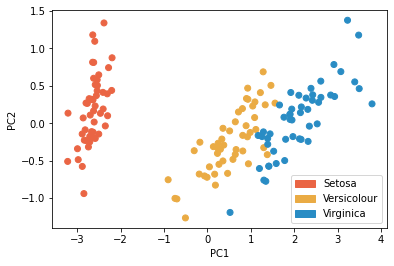

In [0]:
import matplotlib.patches as mpatches
# Plotting the results of PCA

colormap = np.array(['#EA6544', '#EAAB44', '#298CC4'])
plt.scatter(X_pca[:,0], X_pca[:,1], c = colormap[y])

se_lab = mpatches.Patch(color='#EA6544', label='Setosa')
ver_lab = mpatches.Patch(color='#EAAB44', label='Versicolour')
vir_lab = mpatches.Patch(color='#298CC4', label='Virginica')

plt.legend(handles=[se_lab, ver_lab, vir_lab])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [0]:
# Test-train split and apply PCA

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
pcaDecTree = DecisionTreeClassifier(max_depth=3)
pcaDecTree.fit(X_train, y_train)
acc = pcaDecTree.score(X_test,y_test)

print('Accuracy: ', acc)

Accuracy:  0.9111111111111111


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination. 

No. 因為資料集本身的維度並不高（只有4個feature）， 而使用PCA方法降維會導致一些資訊損失，因此會影響到模型最後的準確率。

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

In [0]:
from sklearn import preprocessing

nX = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(nX, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)
nDecTree = DecisionTreeClassifier(max_depth=3)
nDecTree.fit(X_train, y_train)
nacc = nDecTree.score(X_test,y_test)
print('Accuracy: ', nacc)
print('Feature Importance:', nDecTree.feature_importances_)

print('-------------Only use two features--------------')
nDecTree = DecisionTreeClassifier(max_depth=3)
nDecTree.fit(X_train[:, 2:4], y_train)
nacc = nDecTree.score(X_test[:, 2:4], y_test)
print('Accuracy: ', nacc)
print('Feature Importance:', nDecTree.feature_importances_)

Accuracy:  0.9333333333333333
Feature Importance: [0.         0.         0.56335283 0.43664717]
-------------Only use two features--------------
Accuracy:  0.9777777777777777
Feature Importance: [0.02894737 0.97105263]


## MNIST

Let's look at a famous handwritten numbers dataset.

In [0]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

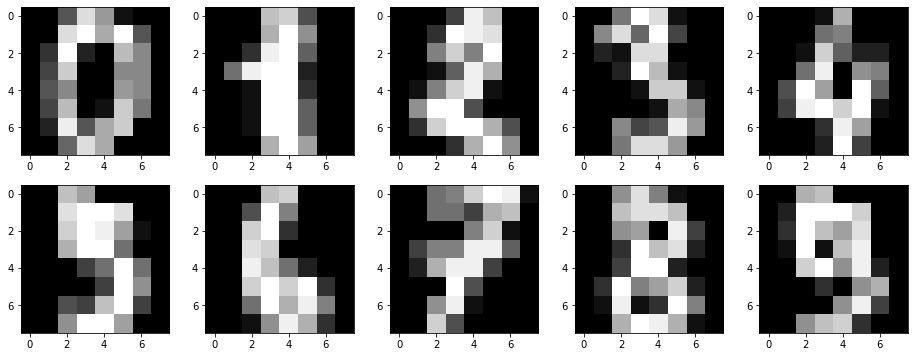

In [0]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

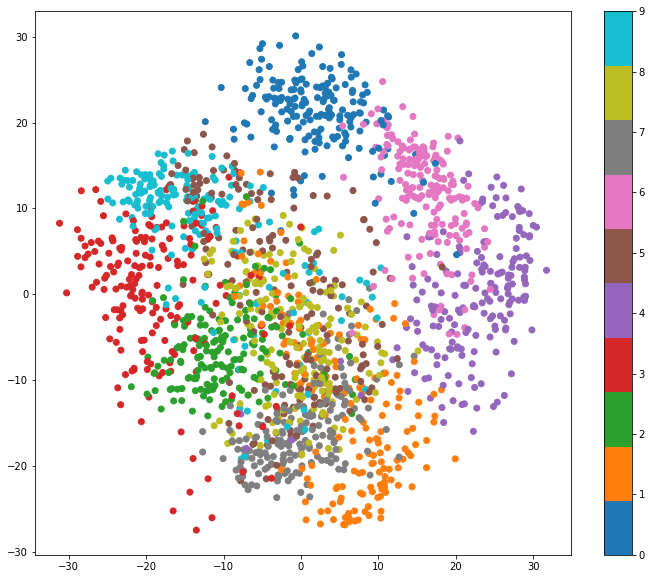

In [0]:
digi_pca = decomposition.PCA(n_components=2)
digi_pca.fit(digi_X)
digi_X_pca = digi_pca.transform(digi_X)

plt.figure(figsize= (12, 10))
cmap = plt.get_cmap('tab10', 10)
plt.scatter(digi_X_pca[:, 0], digi_X_pca[:, 1], c = digi_y, cmap = cmap)
plt.colorbar()
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?

In [0]:
print("Explained Variance:", digi_pca.explained_variance_ratio_)
print("Total Explained Variance:", digi_pca.explained_variance_ratio_.sum())

Explained Variance: [0.14890594 0.13618771]
Total Explained Variance: 0.28509364823689276


降的維度太多，導致保留的variance不夠多

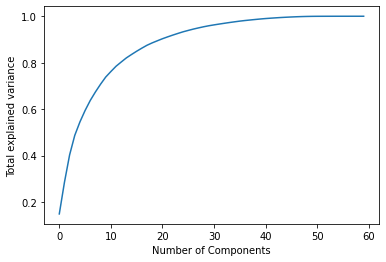

In [0]:
digi_pca = decomposition.PCA(n_components=60)
digi_pca.fit(digi_X)

plt.figure()
plt.plot(np.cumsum(digi_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total explained variance')
plt.show()

In [0]:
np.argmax(digi_pca.explained_variance_ratio_.cumsum() > 0.9)

20

若是將維度設定為20，即可以保留90%以上的variance

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

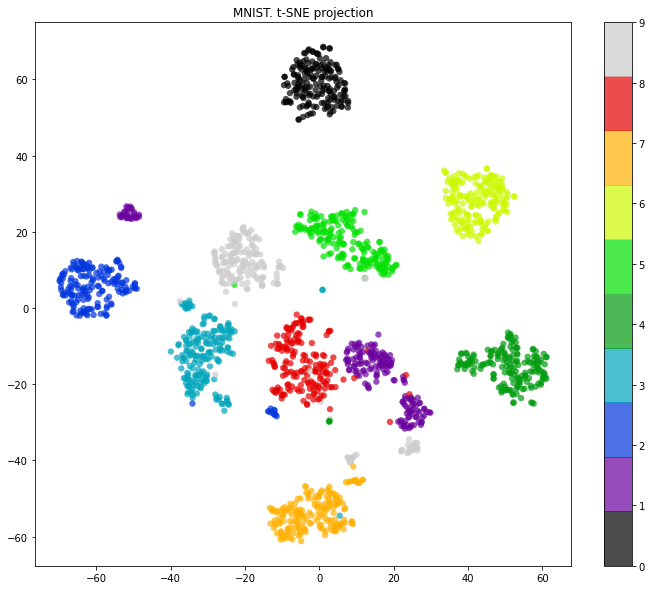

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

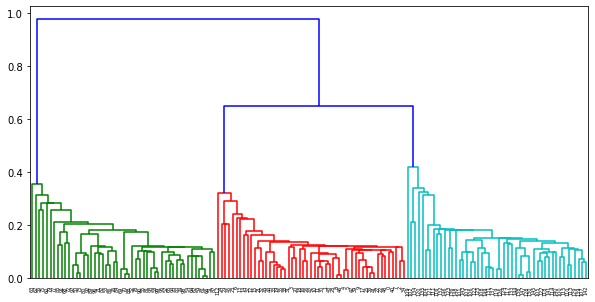

In [0]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

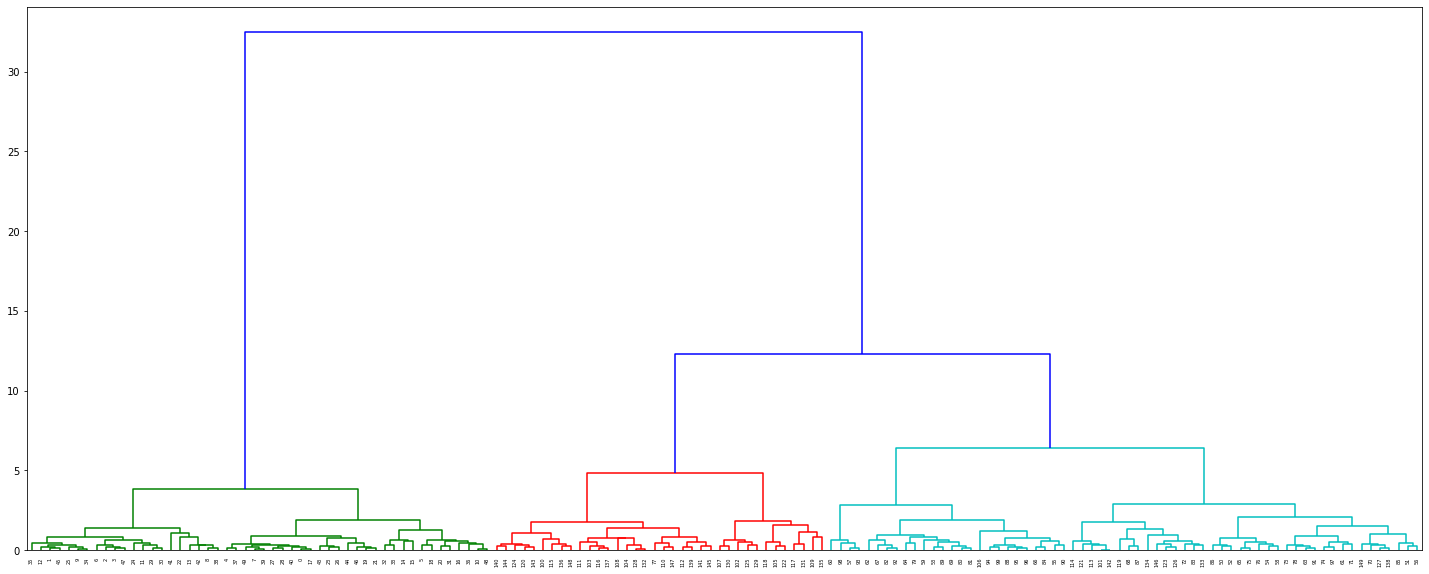

In [0]:

Z = hierarchy.linkage(X, 'ward') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(25,10))
dn = hierarchy.dendrogram(Z, color_threshold=7)

In [0]:
cutree = hierarchy.cut_tree(Z, height=7)
cutree = cutree.flatten()
print(cutree == y)
print('---------Misclassified data:-----------')
np.where((cutree == y) == False)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True False
  True False  True False  True  True False False  True  True  True  True
  True False False  True  True  True False  True  True  True False  True
  True  True False  True  True False]
---------Misclassified data:-----------


(array([ 77, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138,
        142, 146, 149]),)